# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Litesh Samji

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
#create url for query with imperial units and city at the end
#url from https://openweathermap.org/appid
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

# Lists for results
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"Processing Record: {city}")
    except:
        print(f"City NOT found: {city}")
print("Complete")

Processing Record: srednekolymsk
Processing Record: canutama
Processing Record: kiunga
Processing Record: poum
Processing Record: bambous virieux
Processing Record: port hedland
Processing Record: salalah
Processing Record: jamestown
Processing Record: mar del plata
Processing Record: otukpo
Processing Record: ushuaia
Processing Record: alofi
Processing Record: nanortalik
Processing Record: barrow
City NOT found: burica
Processing Record: saint george
Processing Record: kenai
Processing Record: hermanus
Processing Record: mataura
Processing Record: trairi
Processing Record: cape town
Processing Record: ribeira grande
Processing Record: manaure
City NOT found: afmadu
Processing Record: porbandar
Processing Record: severo-kurilsk
Processing Record: cayenne
Processing Record: itoman
Processing Record: busselton
Processing Record: east london
Processing Record: cherskiy
Processing Record: champerico
Processing Record: rikitea
Processing Record: puerto ayora
Processing Record: araouane
Proc

Processing Record: pundaguitan
Processing Record: mount gambier
Processing Record: roma
Processing Record: tazovskiy
City NOT found: phan rang
City NOT found: jilmah
City NOT found: samalaeulu
Processing Record: alamosa
Processing Record: broome
Processing Record: charters towers
Processing Record: tura
Processing Record: paita
Processing Record: moerai
Processing Record: arman
Processing Record: moshenskoye
Processing Record: kurmanayevka
Processing Record: lompoc
Processing Record: torbay
Processing Record: teknaf
Processing Record: fairbanks
Processing Record: ilulissat
Processing Record: coquimbo
City NOT found: aflu
Processing Record: thompson
Processing Record: haapiti
Processing Record: labuan
Processing Record: necochea
Processing Record: puri
Processing Record: atocha
Processing Record: berlevag
Processing Record: kawalu
Processing Record: tyrma
Processing Record: tiarei
City NOT found: vaitupu
Processing Record: moissala
Processing Record: teguise
Processing Record: nuevo pro

Processing Record: radomsko
Processing Record: bethanien
Processing Record: high level
Processing Record: sao pedro do sul
Processing Record: kieta
Processing Record: chekhov
Processing Record: souillac
Processing Record: oktyabrskoye
Processing Record: borgarnes
Processing Record: chumikan
Processing Record: waddan
Processing Record: morondava
Processing Record: hirara
Processing Record: umea
Processing Record: mananum
Processing Record: gizo
Processing Record: acarau
Processing Record: buala
Processing Record: dir
Processing Record: lakes entrance
Processing Record: batticaloa
Processing Record: villablino
Processing Record: inta
City NOT found: meyungs
City NOT found: warqla
Processing Record: keti bandar
Processing Record: sao joao da barra
Processing Record: elizabeth city
Processing Record: bauchi
Processing Record: el tigre
Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
city_weather_df = pd.DataFrame({"City": foundCities,
                        "Lat": lat,
                        "Lng": lon,
                        "Max Temp": temp,
                        "Humidity": humidity,
                        "Cloudiness": cloudiness,                                                    
                        "Wind speed":windSpeed,
                        "Country": country, 
                        "Date": date
                          })

#Save to file
city_weather_df.to_csv("../output/cities.csv", index=True, index_label="City", header=True)

#Print dataframe
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind speed,Country,Date
0,srednekolymsk,67.4500,153.6833,48.76,64,100,18.12,RU,1623808227
1,canutama,-6.5339,-64.3831,71.53,98,99,2.84,BR,1623808228
2,kiunga,-6.1219,141.2906,83.19,75,79,2.98,PG,1623808229
3,poum,-20.2333,164.0167,75.85,81,31,8.16,NC,1623808229
4,bambous virieux,-20.3428,57.7575,70.21,100,75,4.61,MU,1623808230


In [16]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,18.398241,14.776316,67.356673,72.113879,59.606762,7.504146,1.623808e+09
std,33.424806,90.214548,14.718348,19.593585,38.975107,5.529736,1.280985e+02
min,-54.800000,-179.166700,26.280000,7.000000,0.000000,0.000000,1.623808e+09
25%,-8.819500,-65.026250,57.232500,62.000000,20.000000,3.440000,1.623808e+09
50%,19.317250,17.150000,69.540000,76.000000,75.000000,5.990000,1.623808e+09
75%,48.204125,97.472525,79.207500,87.000000,99.000000,10.057500,1.623809e+09
max,77.484000,173.858300,106.950000,100.000000,100.000000,32.060000,1.623809e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
humidity_over_100 = city_weather_df[(city_weather_df['Humidity'] > 100)]
humidity_over_100

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date


In [6]:
#  Get the indices of cities that have humidity over 100%.
 Humidity100Index = humidity_over_100.index

In [46]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

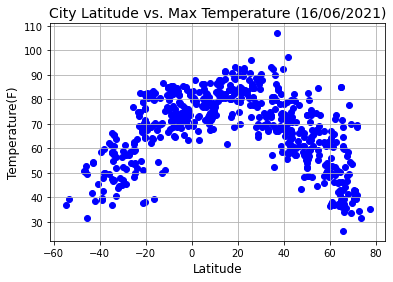

In [17]:
plt.scatter(lat, temp, marker="o", facecolors="blue")

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Max Temperature (16/06/2021)", fontsize=14)
plt.ylabel("Temperature(F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Save and show scatter plot
plt.savefig("../Images/latitude-vs-temp.png")
plt.show()


### Analysis
Scatterplot (above) for Temperature (F) vs. Latitude shows temperatures North and South of the Equator have lower max temperatures as compared to temperature closer to the Equator. 

## Latitude vs. Humidity Plot

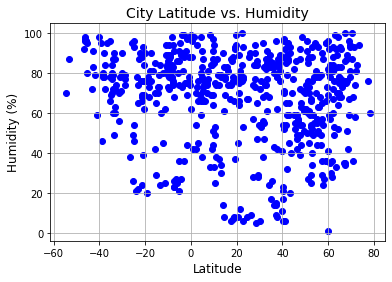

In [63]:
plt.scatter(lat, humidity, marker="o", facecolors="blue")

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Humidity", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-humidity.png")
plt.show()

In [ ]:
### Analysis 
There seems to be no correlation between City Latitude and Humidity levels for randomly selected cities.

## Latitude vs. Cloudiness Plot

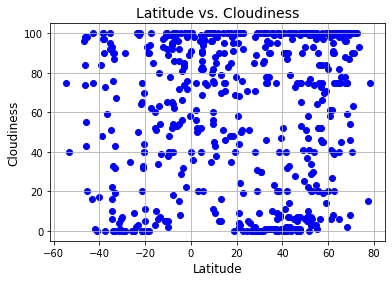

In [65]:
plt.scatter(lat, cloudiness, marker="o", facecolors="blue")

# --- add labels, title, limits & grid ---
plt.title("Latitude vs. Cloudiness", fontsize=14)
plt.ylabel("Cloudiness", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-cloudiness.png")
plt.show()


In [ ]:
### Analysis
There seems to be no correlation between Latitude and Cloudiness 

## Latitude vs. Wind Speed Plot

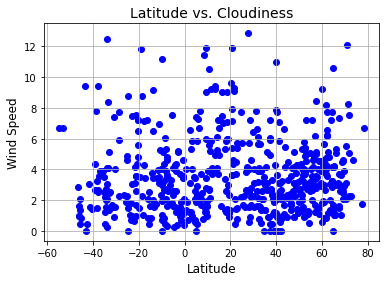

In [66]:
plt.scatter(lat, windSpeed, marker="o", facecolors="blue")

# --- add labels, title, limits & grid ---
plt.title("Latitude vs. Cloudiness", fontsize=14)
plt.ylabel("Wind Speed", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-cloudiness.png")
plt.show()

In [ ]:
### Analysis
No correlation between Latitude and cloudiness. However wind speed during this time of the year is low.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is -0.7259066947934789
y = -0.53x + 88.85


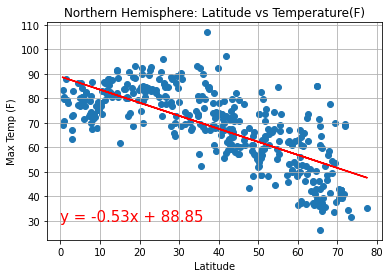

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is 0.7448246556771979
y = 0.75x + 80.48


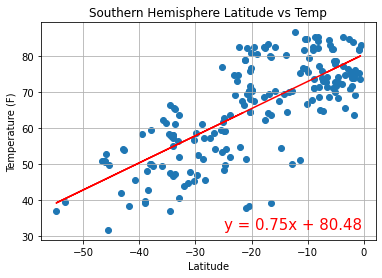

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is -0.09988438118802952
y = -0.1x + 74.48


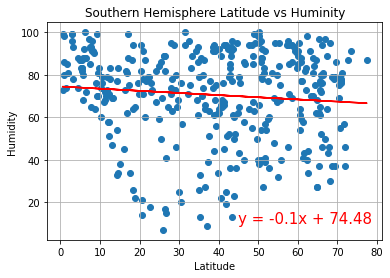

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


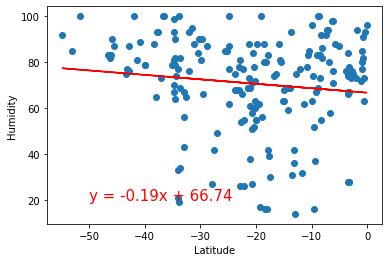

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


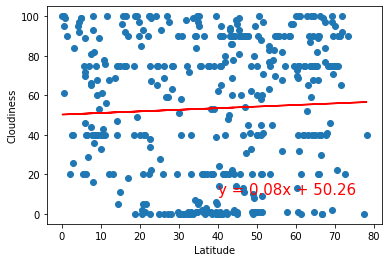

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


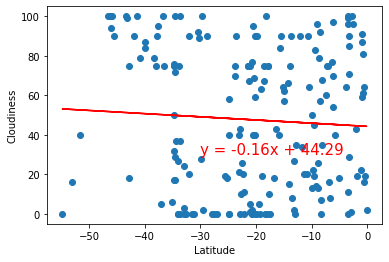

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


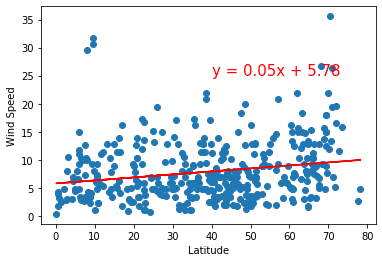

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


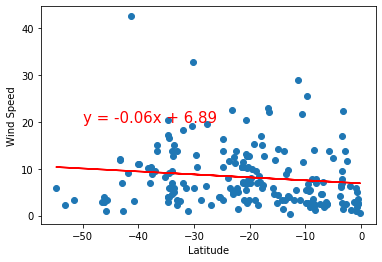